In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('cool')
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv("/Users/zhansaya/Downloads/cover-type-forest-prediction/train-set.csv")

In [3]:
test = pd.read_csv("/Users/zhansaya/Downloads/cover-type-forest-prediction/test-set.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528720 entries, 0 to 528719
Data columns (total 56 columns):
Id                                    528720 non-null int64
Elevation                             528720 non-null int64
Aspect                                528720 non-null int64
Slope                                 528720 non-null int64
Horizontal_Distance_To_Hydrology      528720 non-null int64
Vertical_Distance_To_Hydrology        528720 non-null int64
Horizontal_Distance_To_Roadways       528720 non-null int64
Hillshade_9am                         528720 non-null int64
Hillshade_Noon                        528720 non-null int64
Hillshade_3pm                         528720 non-null int64
Horizontal_Distance_To_Fire_Points    528720 non-null int64
Wilderness_Area1                      528720 non-null int64
Wilderness_Area2                      528720 non-null int64
Wilderness_Area3                      528720 non-null int64
Wilderness_Area4                      528720 non-

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226595 entries, 0 to 226594
Data columns (total 55 columns):
Id                                    226595 non-null int64
Elevation                             226595 non-null int64
Aspect                                226595 non-null int64
Slope                                 226595 non-null int64
Horizontal_Distance_To_Hydrology      226595 non-null int64
Vertical_Distance_To_Hydrology        226595 non-null int64
Horizontal_Distance_To_Roadways       226595 non-null int64
Hillshade_9am                         226595 non-null int64
Hillshade_Noon                        226595 non-null int64
Hillshade_3pm                         226595 non-null int64
Horizontal_Distance_To_Fire_Points    226595 non-null int64
Wilderness_Area1                      226595 non-null int64
Wilderness_Area2                      226595 non-null int64
Wilderness_Area3                      226595 non-null int64
Wilderness_Area4                      226595 non-

In [6]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2611,326,20,120,27,1597,168,214,184,...,0,0,0,0,0,0,0,0,0,6
1,2,2772,324,17,42,7,1814,175,220,183,...,0,0,0,0,0,0,0,0,0,2
2,3,2764,4,14,480,-21,700,201,212,148,...,0,0,0,0,0,0,0,0,0,2
3,4,3032,342,9,60,8,4050,202,227,164,...,0,0,0,0,0,0,0,0,0,2
4,5,2488,23,11,117,21,1117,209,218,151,...,0,0,0,0,0,0,0,0,0,2


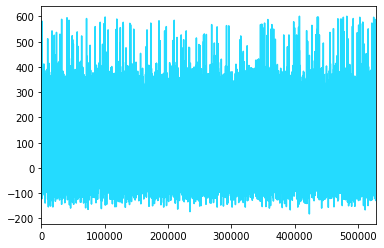

In [7]:
df["Vertical_Distance_To_Hydrology"].plot() # there are negative numbers, distance can't be negative

In [8]:
df[df["Vertical_Distance_To_Hydrology"] < 0] = df["Vertical_Distance_To_Hydrology"].mean() #thats why all negative numbers replace by the mean value

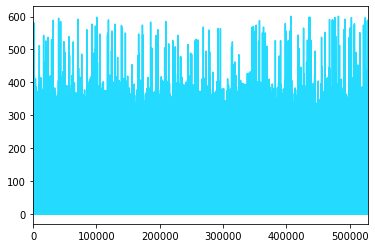

In [9]:
df["Vertical_Distance_To_Hydrology"].plot() # the same Horizontal. Distance can't be negative

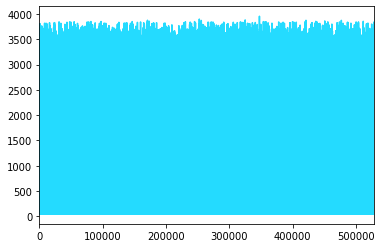

In [10]:
df['Elevation'].plot()

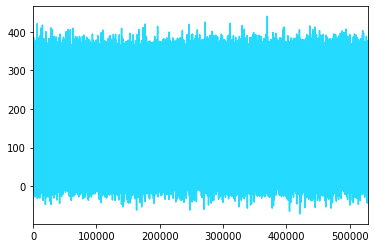

In [11]:
df["Aspect"].plot() # tochno ne polya chto eto no vrode tozhe ne dolzho byt negative

In [12]:
df[df["Aspect"] < 0] = df["Aspect"].mean()

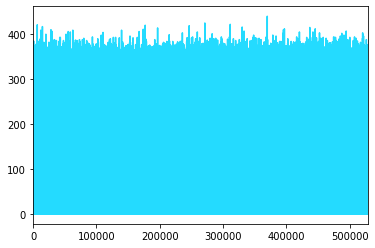

In [13]:
df["Aspect"].plot()

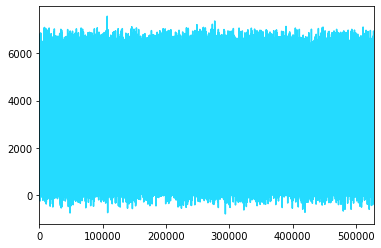

In [14]:
df['Horizontal_Distance_To_Roadways'].plot() # there are negative numbers, distance can't be negative

In [15]:
df[df["Horizontal_Distance_To_Roadways"] < 0] = df["Horizontal_Distance_To_Roadways"].mean() # replace by mean value of Horizontal_Distance_To_Roadways 

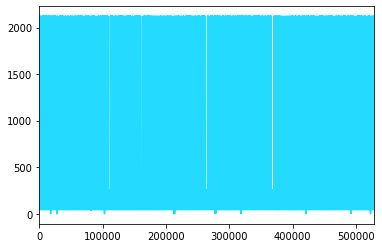

In [16]:
df['Hillshade_9am'].plot() # also negative nubers, only from 0 to 250

In [17]:
df[df["Hillshade_9am"] < 0] = df["Hillshade_9am"].mean()

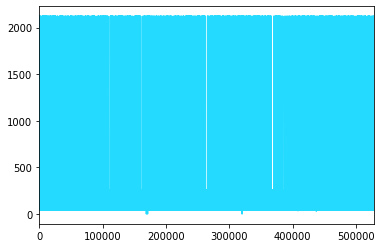

In [18]:
df['Hillshade_Noon'].plot()

In [19]:
df[df["Hillshade_Noon"] < 0] = df["Hillshade_Noon"].mean()

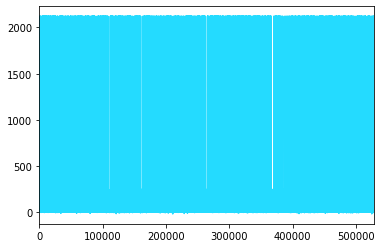

In [20]:
df['Hillshade_3pm'].plot()

In [21]:
df[df["Hillshade_3pm"] < 0] = df["Hillshade_3pm"].mean()

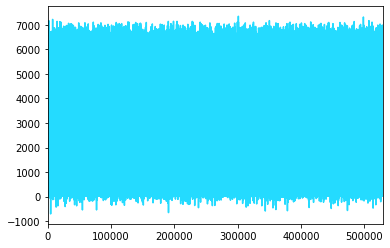

In [22]:
df['Horizontal_Distance_To_Fire_Points'].plot()

In [23]:
df[df["Horizontal_Distance_To_Fire_Points"] < 0] = df["Horizontal_Distance_To_Fire_Points"].mean()

In [24]:
df['Wilderness_Area1'].value_counts() #dolzhno byt tolko 0 and 1, a tut ewe drugie cifry,

0.000000       262270
1.000000       207121
46.474718       55709
145.930220       2346
2121.511466       761
1774.809811       411
135.878859        100
196.443376          2
Name: Wilderness_Area1, dtype: int64

In [25]:
df[df["Wilderness_Area1"] >46] = 0

In [26]:
df['Wilderness_Area1'].value_counts()

0.0    321599
1.0    207121
Name: Wilderness_Area1, dtype: int64

In [27]:
df['Cover_Type'].value_counts()

2.0    229734
1.0    168544
0.0     59329
3.0     30021
7.0     16694
6.0     14338
5.0      7733
4.0      2327
Name: Cover_Type, dtype: int64

In [28]:
df['Wilderness_Area1'].value_counts()

0.0    321599
1.0    207121
Name: Wilderness_Area1, dtype: int64

In [29]:
df['Wilderness_Area2'].value_counts()

0.0    505857
1.0     22863
Name: Wilderness_Area2, dtype: int64

In [30]:
df['Wilderness_Area3'].value_counts()

0.0    321004
1.0    207716
Name: Wilderness_Area3, dtype: int64

In [31]:
df['Wilderness_Area4'].value_counts() # в остальных все нормально

0.0    497029
1.0     31691
Name: Wilderness_Area4, dtype: int64

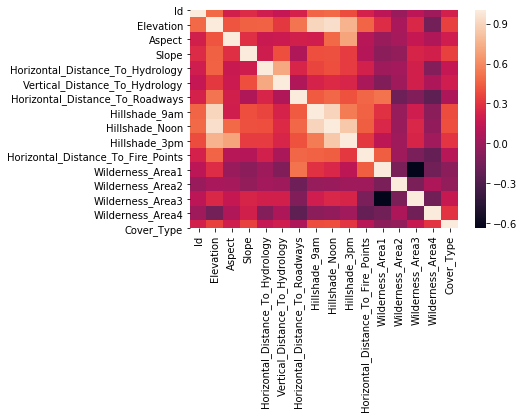

In [103]:
sns.heatmap(df.corr()) # delaem heatmap dlya togo choby posmotret chto vliyaet na nash target

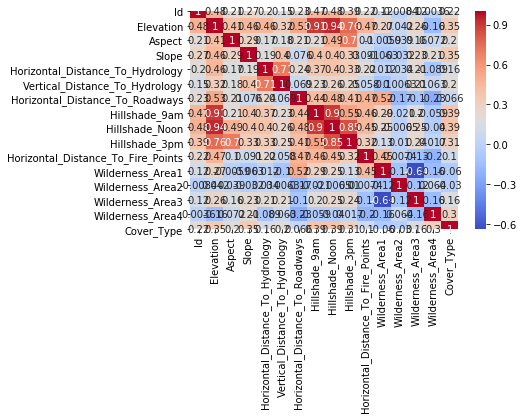

In [104]:
sns.heatmap(df.corr(),cmap="coolwarm", annot=True) # dlya bolee ponyatnosti ispolsuem so znacheniyami

In [ ]:
 #model

In [32]:
X = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4',
       'Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type8','Soil_Type9','Soil_Type10',
       'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
        'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
'Soil_Type32','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'       
       ]] #Features
y = df['Cover_Type'] #Target

In [34]:
X_test = test[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4',
       'Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type8','Soil_Type9','Soil_Type10',
       'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
        'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
'Soil_Type32','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'       
   ]] 

In [35]:
rdmf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rdmf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred = rdmf.predict(X_test)
print(y_pred)

[2. 2. 1. ... 7. 3. 2.]


In [38]:
y_pred=y_pred.astype(int)
print(y_pred)

[2 2 1 ... 7 3 2]


In [39]:
data = dict(Id=test["Id"], Cover_Type=y_pred)

df1 = pd.DataFrame(data)

df1.to_csv('/Users/zhansaya/Downloads/cover-type-forest-prediction/final2.csv', sep=',', index=False)

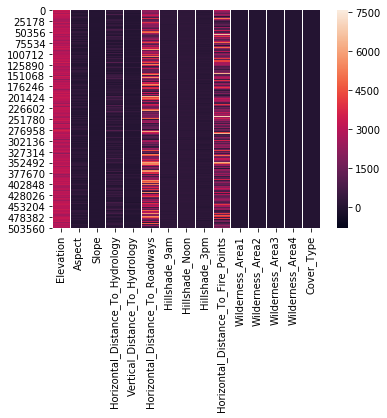

In [41]:
ax = sns.heatmap(df)

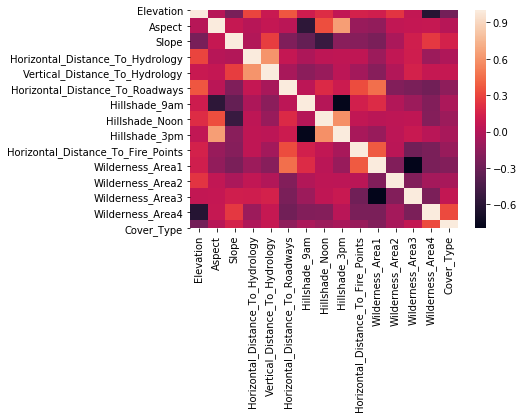

In [46]:
sns.heatmap(df.corr())

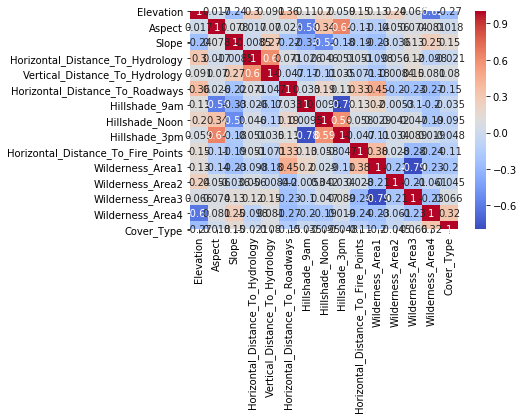

In [48]:
sns.heatmap(df.corr(),cmap="coolwarm", annot=True)